In [23]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.activations import softmax
from sklearn.model_selection import train_test_split
import time

# Mnist step by step

### Step 1: read data

In [24]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [25]:
train.shape

(42000, 785)

In [26]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test.shape

(28000, 784)

In [28]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Separate data

In [43]:
# Seperating target and image pixels
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values, all rows, without first (0) column
Y_train = train.iloc[:,0].values.astype('int32') # only labels, all rows, only first (0) column
X_test = test.values.astype('float32')

In [30]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [31]:
X_train.shape

(42000, 784)

In [32]:
Y_train

array([1, 0, 1, ..., 7, 6, 9])

In [33]:
Y_train.shape

(42000,)

In [34]:
X_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [35]:
X_test.shape

(28000, 784)

In [36]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [37]:
#Reshaping train to 28 * 28 pixel size with 1 color (grey scale)
X_train = X_train.reshape(-1, 28, 28, 1)
#X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [38]:
#Reshaping test to 28 * 28 pixel size with 1 color (grey scale)
X_test = X_test.reshape(-1, 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [44]:
# Find the unique numbers from the train labels
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [45]:
#Label encoding
Y_train = to_categorical(Y_train, num_classes = nClasses)
#Y_train2 = to_categorical(Y_train).astype("uint8")

In [46]:
Y_train

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]], dtype=float32)

In [48]:
Y_train.shape

(42000, 10)

In [49]:
# Normalize the data,
# Colors are from 0 to 255. 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [50]:
Y_train

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]], dtype=float32)

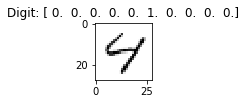

In [63]:
plt.figure(figsize=(12,10))
plt.subplot(y, x, 5)
plt.imshow(X_train[3].reshape((28,28)), cmap=plt.cm.gray_r,interpolation='nearest')
plt.title("Digit: {}".format(Y_test[3]))
plt.show()

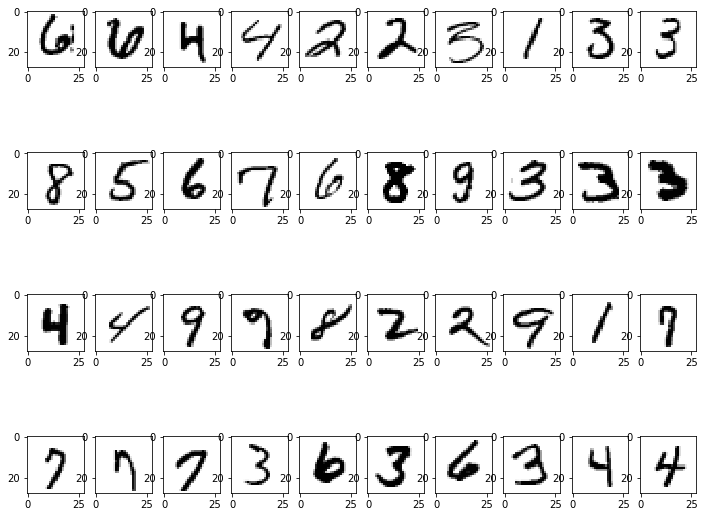

In [71]:
%matplotlib inline
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()